<a href="https://colab.research.google.com/github/26112/INDUSAI--INTERN-TASKS-ANUJ-BAGHEL/blob/main/Trending_Youtube_Videos_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import chain


In [2]:
df = pd.read_csv("youtube.csv")

# Basic cleanup
df = df.drop_duplicates()
df = df[(df['views'] > 0) & (df['likes'] > 0)]  # Remove zero engagement


/tmp/ipython-input-3-3072268812.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='views', y='title', palette='viridis')


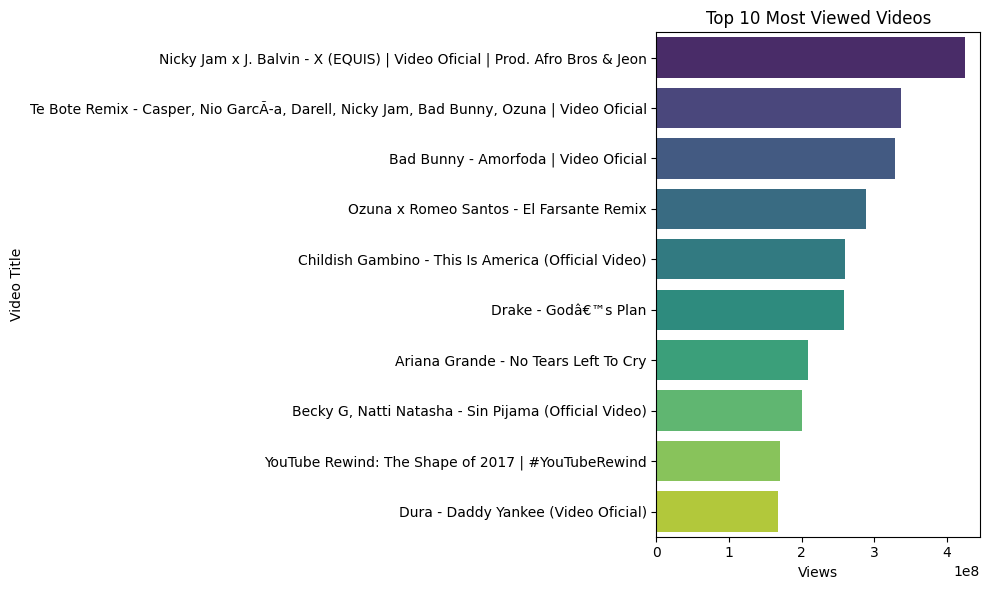

In [3]:
top10 = df.sort_values(by='views', ascending=False).drop_duplicates(subset='title').head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=top10, x='views', y='title', palette='viridis')
plt.title("Top 10 Most Viewed Videos")
plt.xlabel("Views")
plt.ylabel("Video Title")
plt.tight_layout()
plt.show()


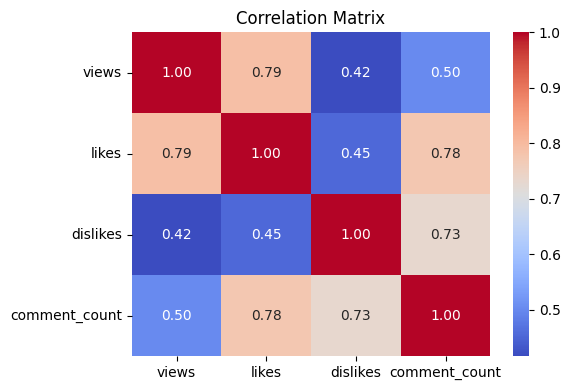

In [4]:
corr = df[['views', 'likes', 'dislikes', 'comment_count']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


/tmp/ipython-input-5-2703070644.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_tags_df, x="Frequency", y="Tag", palette="rocket")


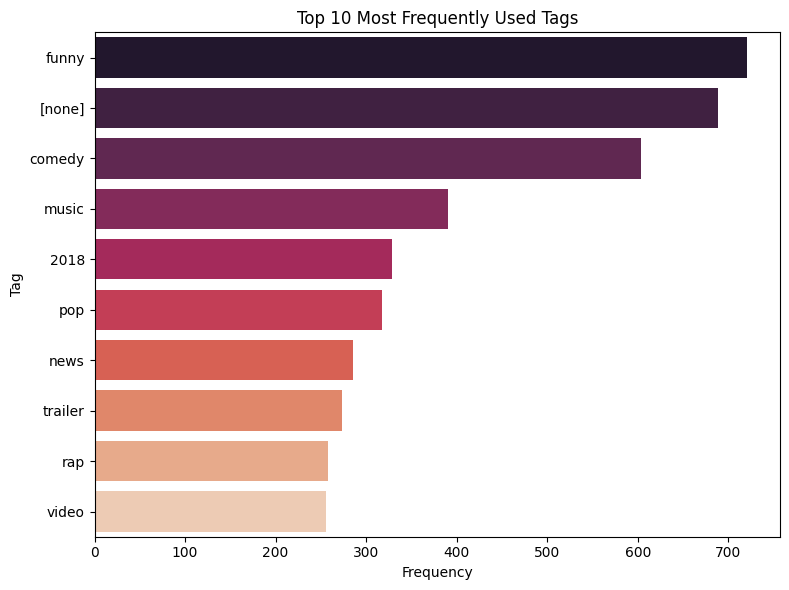

In [5]:
sampled_tags = df['tags'].dropna().sample(10000, random_state=42)
tag_lists = sampled_tags.apply(lambda x: x.lower().replace('"', '').split('|'))
flat_tags = list(chain.from_iterable(tag_lists))
tag_counts = Counter(flat_tags)

top_tags_df = pd.DataFrame(tag_counts.most_common(10), columns=["Tag", "Frequency"])

plt.figure(figsize=(8,6))
sns.barplot(data=top_tags_df, x="Frequency", y="Tag", palette="rocket")
plt.title("Top 10 Most Frequently Used Tags")
plt.tight_layout()
plt.show()


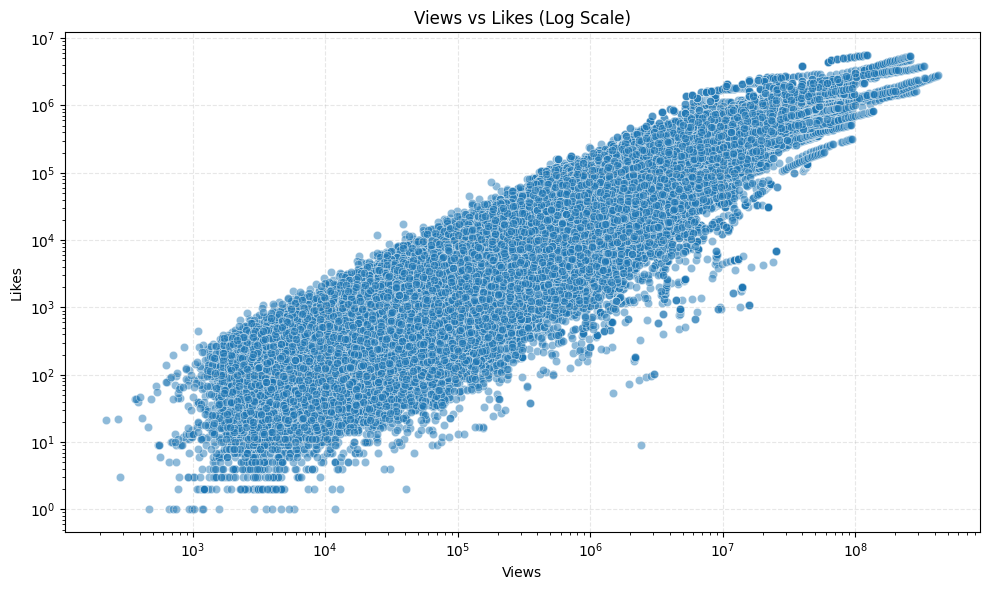

In [6]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='views', y='likes', alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.title('Views vs Likes (Log Scale)')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


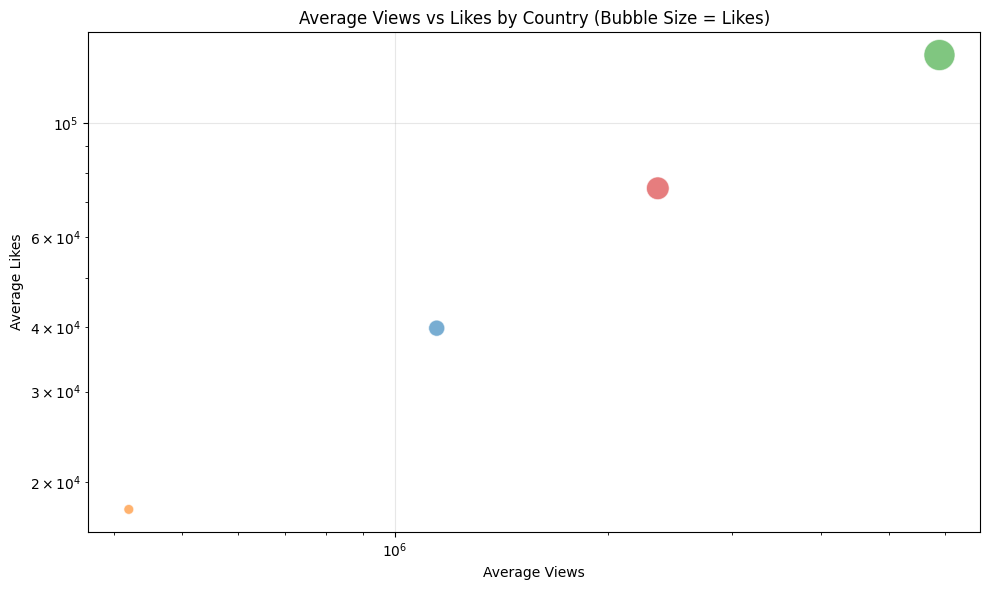

In [7]:
plt.figure(figsize=(10,6))
country_avg = df.groupby('publish_country')[['views', 'likes']].mean().reset_index()

sns.scatterplot(data=country_avg, x='views', y='likes', size='likes',
                hue='publish_country', sizes=(50, 500), legend=False, alpha=0.6)

plt.title("Average Views vs Likes by Country (Bubble Size = Likes)")
plt.xlabel("Average Views")
plt.ylabel("Average Likes")
plt.xscale("log")
plt.yscale("log")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


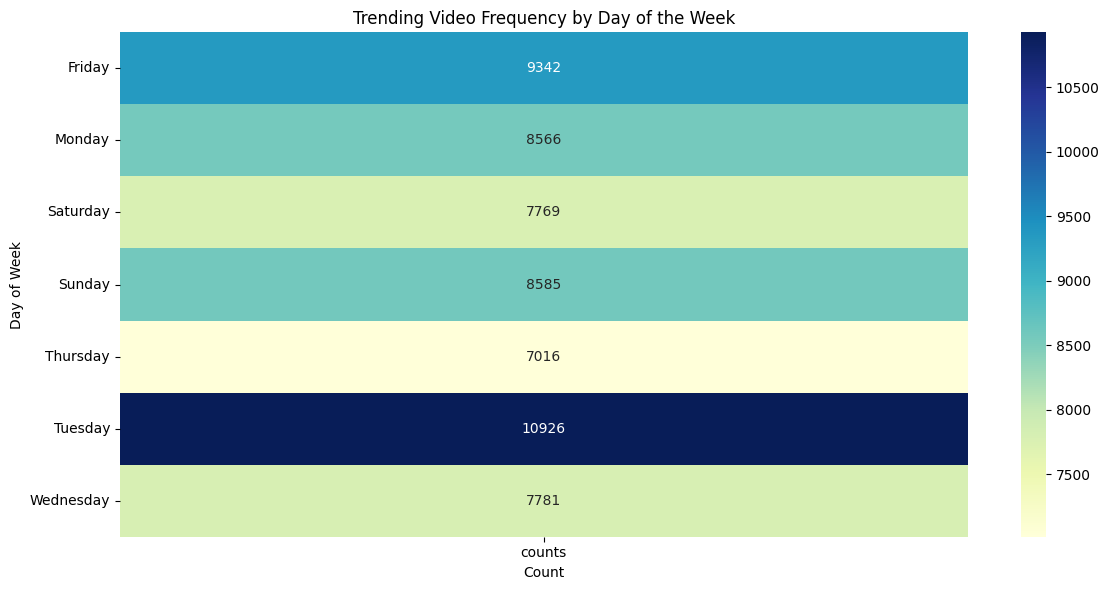

In [10]:
df['trending_date'] = pd.to_datetime(df['trending_date'], errors='coerce')
df['weekday'] = df['trending_date'].dt.day_name()

heatmap_data = df.groupby('weekday').size().reset_index(name='counts')
heatmap_data = heatmap_data.set_index('weekday')


plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Trending Video Frequency by Day of the Week")
plt.xlabel("Count")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()

/tmp/ipython-input-9-1627364864.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_views.values, y=cat_views.index, palette='Spectral')


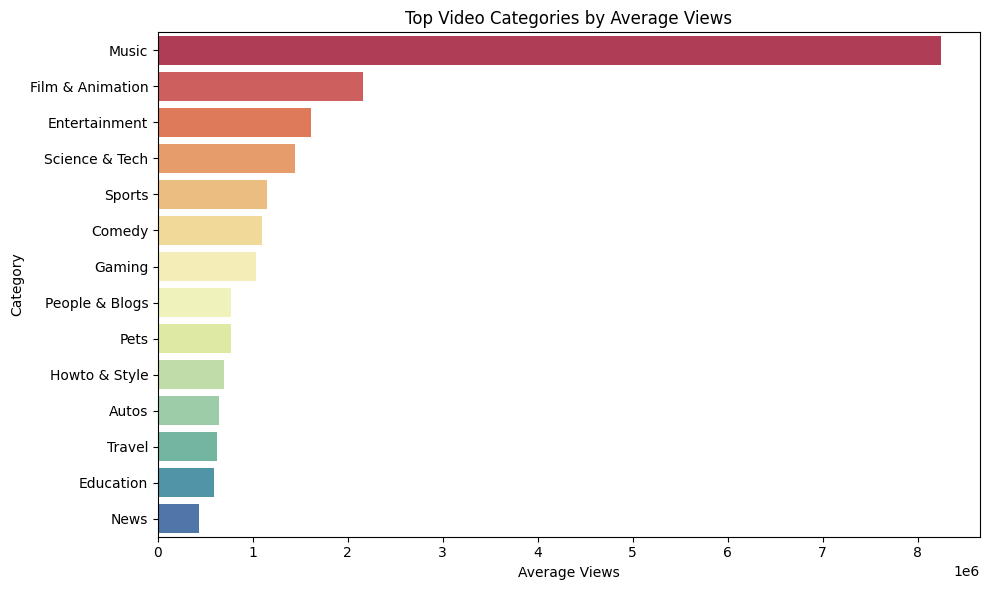

In [9]:
category_map = {
    1: "Film & Animation", 2: "Autos", 10: "Music", 15: "Pets", 17: "Sports",
    19: "Travel", 20: "Gaming", 22: "People & Blogs", 23: "Comedy", 24: "Entertainment",
    25: "News", 26: "Howto & Style", 27: "Education", 28: "Science & Tech"
}
df['category'] = df['category_id'].map(category_map)

cat_views = df.groupby('category')['views'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=cat_views.values, y=cat_views.index, palette='Spectral')
plt.title("Top Video Categories by Average Views")
plt.xlabel("Average Views")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


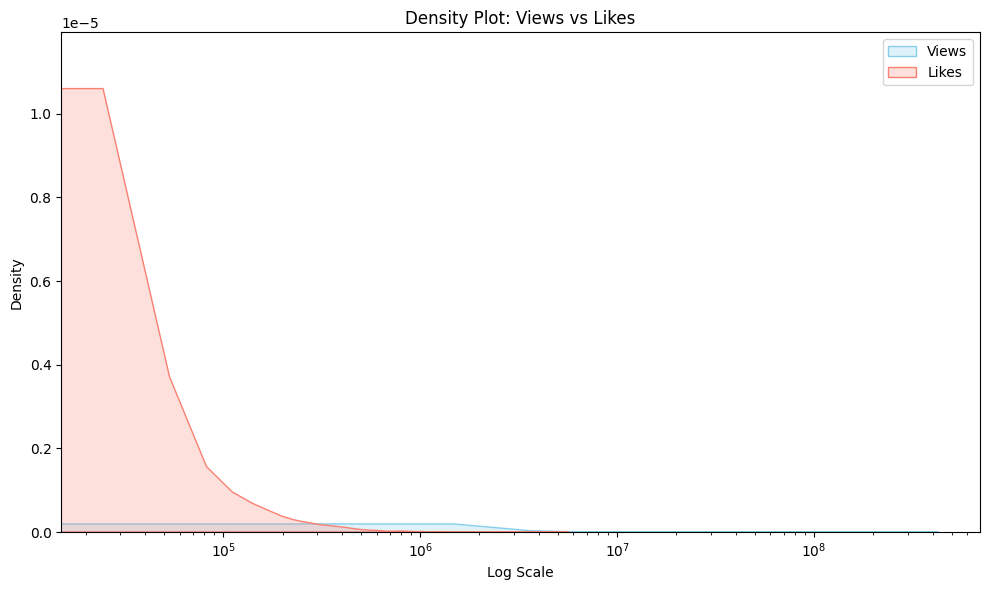

In [11]:
plt.figure(figsize=(10,6))
sns.kdeplot(df['views'], label="Views", fill=True, color='skyblue')
sns.kdeplot(df['likes'], label="Likes", fill=True, color='salmon')
plt.xscale("log")
plt.title("Density Plot: Views vs Likes")
plt.xlabel("Log Scale")
plt.legend()
plt.tight_layout()
plt.show()


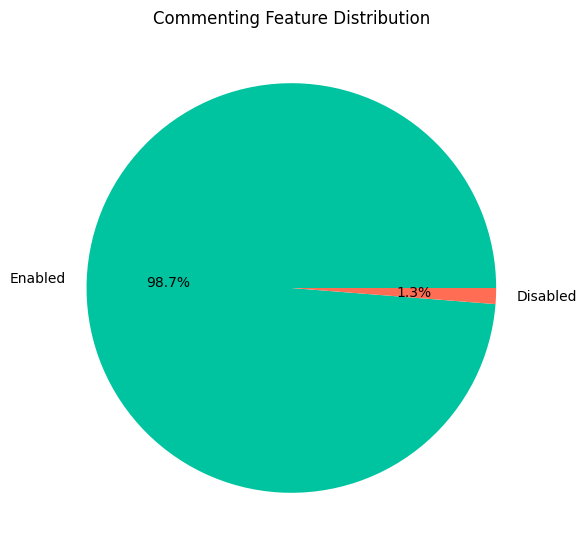

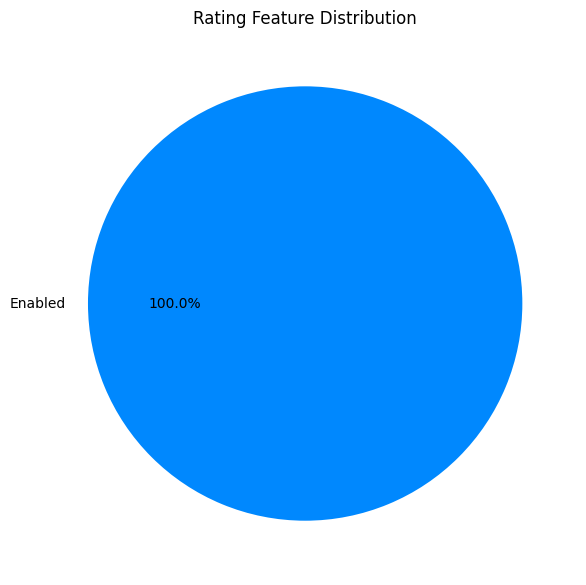

In [12]:
# Comments disabled
plt.figure(figsize=(6,6))
df['comments_disabled'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Enabled', 'Disabled'], colors=['#00C49F', '#FF6E54'])
plt.title("Commenting Feature Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()

# Ratings disabled
plt.figure(figsize=(6,6))
df['ratings_disabled'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Enabled', 'Disabled'], colors=['#0088FE', '#FFBB28'])
plt.title("Rating Feature Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()
